# Visualisations with SeaBorn

Different types of visualisations using SeaBorn.

## Imports

We use the classical data-science packages: [NumPy](https://numpy.org/) (for numerical operations), [SeaBorn](https://seaborn.pydata.org/) (for classical datasets and visualisations) and [Pandas](https://pandas.pydata.org/) (for structuring datasets). 



In [35]:
import scipy.stats as stats
from scipy.optimize import curve_fit

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import pandas as pd 

----
## Simple Line Plot
Our data is a series of points in two dimensions which have a natural sequence. Using [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) makes sense then. Note that to produce a file that can be exported, we use the [`savefile`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) which is a function on plots generated by [Matplotlib](https://matplotlib.org/), the technical basis of seaborn.

Thus, there is no excuse to not also have a vector format!

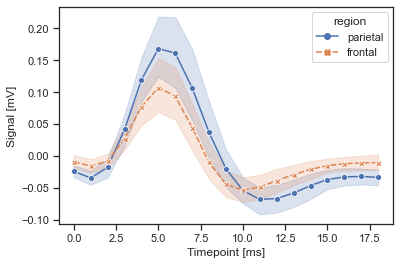

In [45]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="region", style="region",
                 dashes=True,  markers=True, data=fmri);
#ax.lines[0].set_linestyle("-")

plt.ylabel('Signal [mV]')
plt.xlabel('Timepoint [ms]')

plt.savefig('/tmp/Lineplot_multiple.pdf')
plt.show()

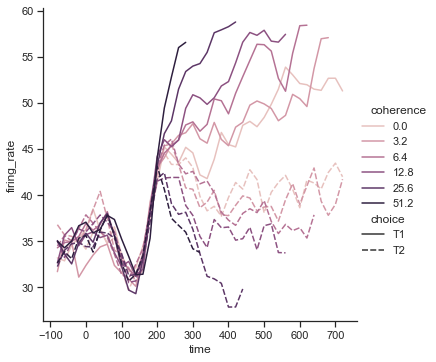

In [48]:
dots = sns.load_dataset("dots").query("align == 'dots'")
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);
plt.savefig('Lineplot_Palette2.png')
plt.show()

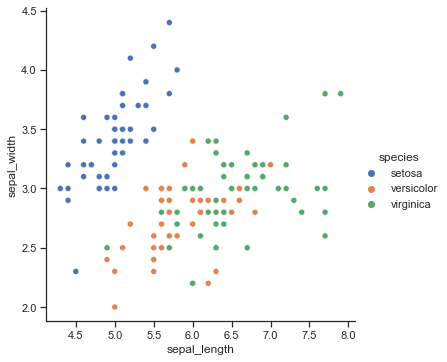

In [49]:
iris=sns.load_dataset("iris")
iris.head()

sns.relplot(x="sepal_length", y="sepal_width", hue='species', data=iris);
plt.savefig('Iris_Col.png')
plt.show()

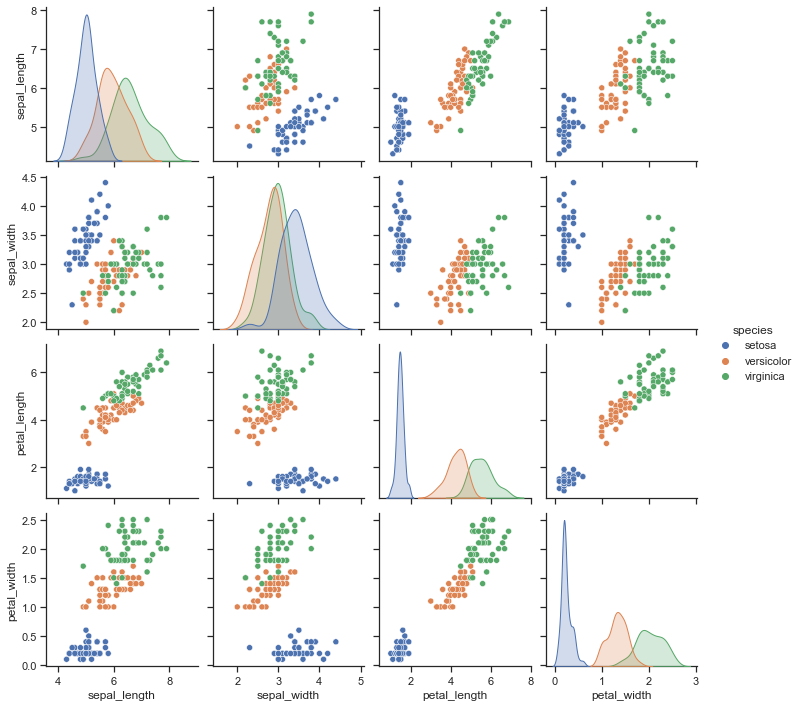

In [52]:
sns.pairplot( hue='species', data=iris);

plt.show()

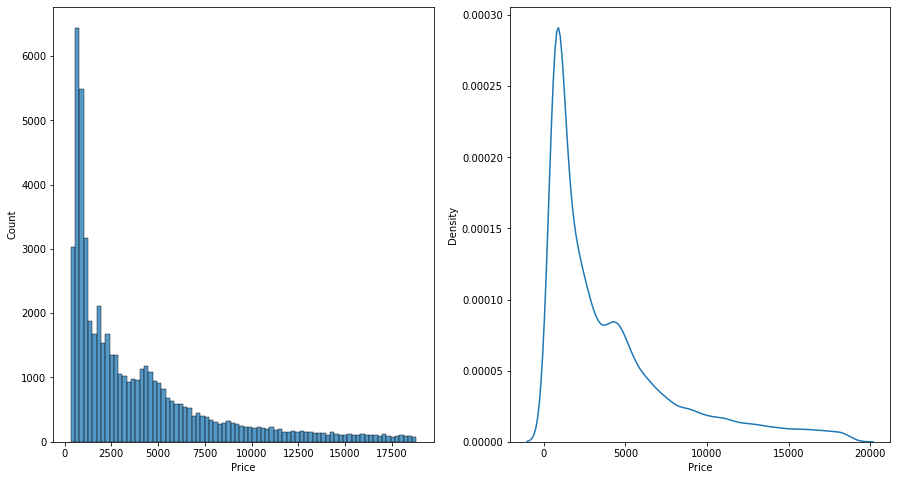

In [10]:
#histogram and KDE
fig, ax = plt.subplots(ncols=2,figsize=(15, 8))


sns.histplot(diamonds, x="price", ax=ax[0])
sns.kdeplot(data=diamonds, x="price",  ax=ax[1])
ax[0].set(xlabel='Price')
ax[1].set(xlabel='Price')
plt.savefig('HistKDE.png')
plt.show()

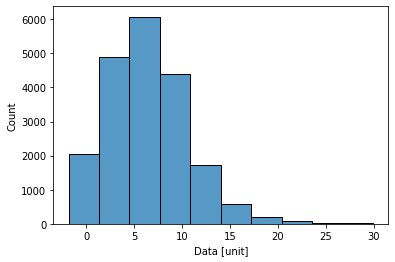

In [11]:
nsample=10000
dist1 = stats.moyal(loc=7.0, scale = 1.5)
dist2 = stats.moyal(loc=2.0, scale = 1.5)
sample1 = dist1.rvs(nsample) 
sample2 = dist2.rvs(nsample)
sample = np.append(sample1, sample2)
sns.histplot(
    sample,
    bins=10
)
plt.xlabel('Data [unit]')
plt.savefig('Moyal_hist_10bins.png')
plt.show()

fitted parameters  [371.61565755   4.86533847   1.07976147]


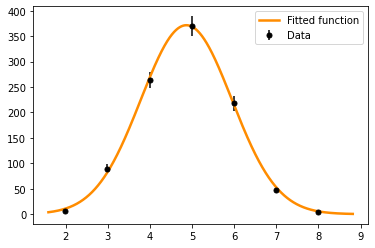

In [12]:


data = stats.norm(5.0, 1.0).rvs(1000)
def fit_function(x, A, mu, sigma):
    return A * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2))

bins = np.arange(np.min(data), np.max(data)+1, 1)
counts,bin_edges = np.histogram(data,bins=bins)

err = np.sqrt(counts)    
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2. -0.1


#Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, xdata=bin_centres, ydata=counts, p0=[1000, 5.0, 1.0])
print('fitted parameters ', popt)

# Generate enough x values to make the curves look smooth.
xspace = np.linspace(np.min(data), np.max(data)+1, 100000)
plt.errorbar(bin_centres, counts, yerr=err, fmt='o', markersize='5', color='black',label="Data" )
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')
plt.legend()
plt.savefig('FittedGauss.png')
plt.show()


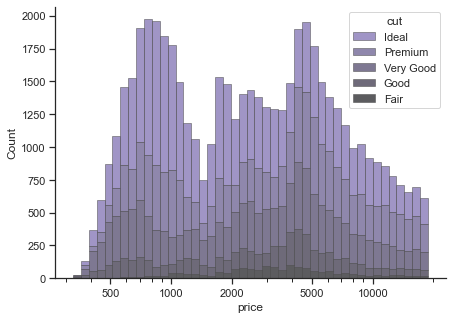

In [13]:
sns.set_theme(style="ticks")



f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="dark:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.savefig('StackedHisto.png')
plt.show()

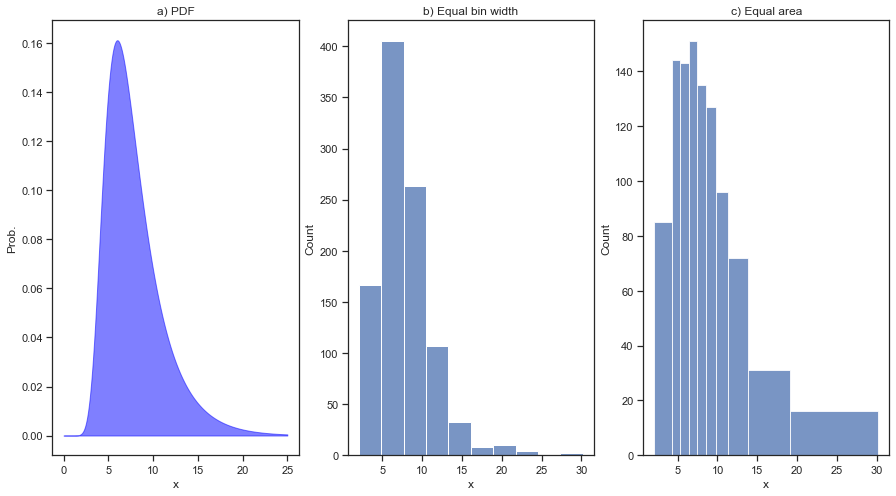

In [14]:
# histogram with equal / variable bins

moyal_dist = stats.moyal(loc=6.0, scale = 1.5)
sample  = moyal_dist.rvs(size=1000)

#https://stackoverflow.com/questions/37649342/matplotlib-how-to-make-a-histogram-with-bins-of-equal-area
def histedges_equalA(x, nbin):
    pow = 0.5
    dx = np.diff(np.sort(x))
    tmp = np.cumsum(dx ** pow)
    tmp = np.pad(tmp, (1, 0), 'constant')
    return np.interp(np.linspace(0, tmp.max(), nbin + 1),
                     tmp,
                     np.sort(x))

fig, ax = plt.subplots(ncols=3,figsize=(15, 8))
nbins=10

x_space = np.linspace(0,25,500)
y = moyal_dist.pdf(x_space)
ax[0].fill_between(x_space,y, color='blue', alpha = 0.5)

sns.histplot(sample, bins=nbins, ax=ax[1])
sns.histplot(sample, bins=histedges_equalA(sample, nbins), ax=ax[2])
ax[0].set(xlabel='x', ylabel='Prob.')
ax[1].set(xlabel='x')
ax[2].set(xlabel='x')

ax[0].set(title='a) PDF')
ax[1].set(title='b) Equal bin width')
ax[2].set(title='c) Equal area')
plt.savefig('FixedVariableBins.png')
plt.show()

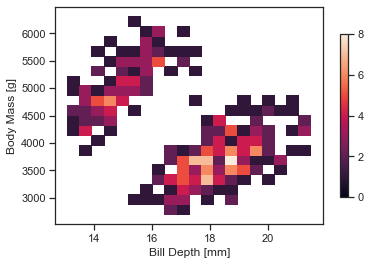

In [15]:
#2D Histo
sns.color_palette("rocket", as_cmap=True)
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g",
             cbar=True, cbar_kws=dict(shrink=.75),
             bins=[20,20],
             cmap="rocket"
             )
plt.ylabel('Body Mass [g]')
plt.xlabel('Bill Depth [mm]')
plt.savefig('2DHisto.png')
plt.show()

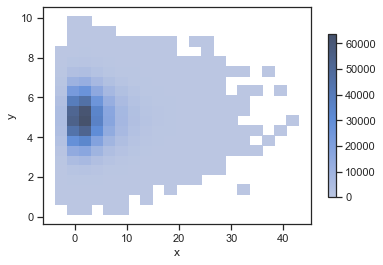

In [16]:
n_sample = 1000000
sample1 =  stats.moyal(loc=1.0, scale = 1.5).rvs(n_sample)
sample2 =  stats.norm(5.0, 1.0).rvs(n_sample) #stats.moyal(loc=3.0, scale = 1.5).rvs(10000)
sns.histplot(x=sample1, y=sample2,
             cbar=True, cbar_kws=dict(shrink=.75),
             bins=[20,20],
             #cmap="rocket"
             )
plt.ylabel('y')
plt.xlabel('x')
plt.savefig('2dHistoMany.png')
plt.show()

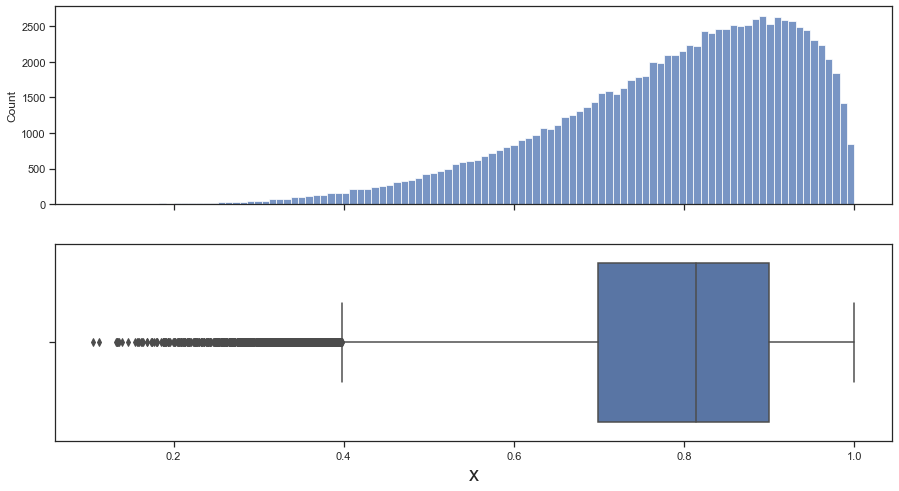

In [17]:
#Box Plot
n_sample = 100000

#sample =  stats.norm(0.0, 1.0).rvs(n_sample)


a, b= 1.5, 5.5
b, a= 1.5, 5.5
sample = stats.beta(a,b).rvs(n_sample)


fig, ax = plt.subplots(nrows=2, sharex=True , figsize=(15, 8))
sns.histplot(x=sample, ax=ax[0])
#sns.swarmplot(x=sample, ax=ax[1])
sns.boxplot(x=sample, ax=ax[1])

plt.xlabel('x',size=20 )
plt.savefig('BoxPlot_Beta_2.png')
plt.show()

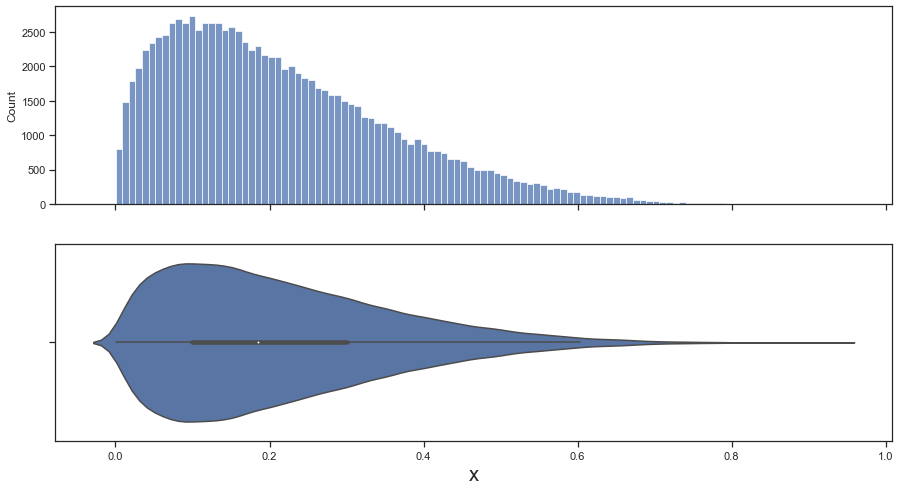

In [18]:
#violin Plot
n_sample = 100000

#sample =  stats.norm(0.0, 1.0).rvs(n_sample)


a, b= 1.5, 5.5
#b, a= 1.5, 5.5
sample = stats.beta(a,b).rvs(n_sample)


fig, ax = plt.subplots(nrows=2, sharex=True , figsize=(15, 8))
sns.histplot(x=sample, ax=ax[0])
sns.violinplot(x=sample, ax=ax[1], inner='box')

plt.xlabel('x',size=20 )
#plt.savefig('ViolinPlot_Gauss.png')
plt.savefig('ViolinPlot_Beta_1.png')
plt.show()

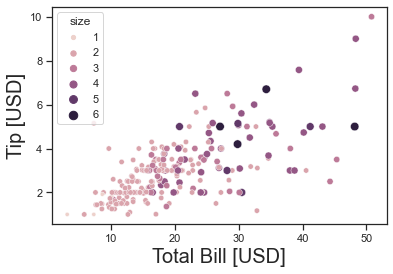

In [19]:
#iris=sns.load_dataset("iris")
tips = sns.load_dataset('tips')

#sns.scatterplot(data=iris, x="sepal_length", y="sepal_width")#, hue='species' );
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="size", size="size")

plt.xlabel('Total Bill [USD]', size=20)
plt.ylabel('Tip [USD]', size=20)
plt.savefig('Scatter_Tips_3.png')
plt.show()
#sns.scatterplot(data=titanic, x='age', y='fare')

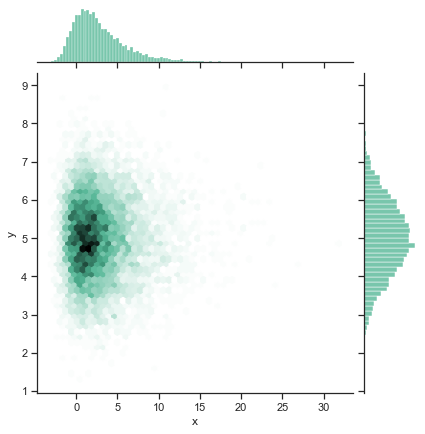

In [20]:
#Scatter with many entries
n_sample = 10000
sample1 =  stats.moyal(loc=1.0, scale = 1.5).rvs(n_sample)
sample2 =  stats.norm(5.0, 1.0).rvs(n_sample) #stats.moyal(loc=3.0, scale = 1.5).rvs(10000)

#sns.scatterplot(x=sample1, y=sample2)
sns.jointplot(x=sample1, y=sample2, kind="hex", color="#4CB391")
plt.ylabel('y')
plt.xlabel('x')
plt.savefig('Scatter_many_joint_hex.png')
plt.show()

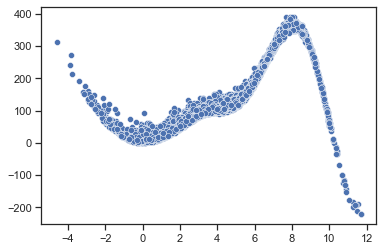

In [21]:
#Profile plot

#generate Data

def generate_test_data(n_samples):
  x = stats.norm.rvs(loc=0.0, scale=1.0, size=n_samples) + 2.0*stats.norm.rvs(loc=2.0, scale=1.0, size=n_samples)
  #y = (np.max(x)-x)*stats.expon.rvs(loc=x*x) + np.abs(x)*stats.norm.rvs(loc=np.abs(x), scale=1.0,size=n_samples )
  y = x*2.0*np.sin(x)*stats.norm.rvs(loc=np.abs(x), scale=0.5,size=n_samples ) + (np.max(x)-x)*stats.expon.rvs(loc=x*x)
  return x, y

x,y = generate_test_data(10000)
sns.scatterplot(x=x,y=y)
plt.show()

In [22]:
# generate random numbers
n_samples = 100000
x_min = -5
x_max = 10 

x = np.random.uniform(x_min, x_max, n_samples)
y = x*2.0*np.sin(x)*stats.norm.rvs(loc=np.abs(x), scale=0.5,size=n_samples ) + (np.max(x)-x)*stats.expon.rvs(loc=x*x) + stats.norm.rvs(loc=0, scale=50,size=n_samples ) 

df = pd.DataFrame({'x': x, 'y': y})

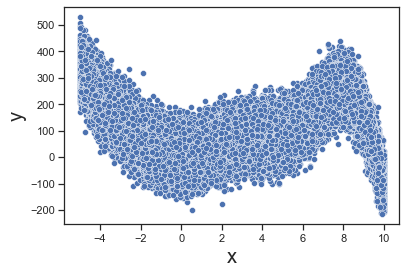

In [23]:
sns.scatterplot(x=x,y=y)
plt.xlabel('x', size = 20)
plt.ylabel('y', size = 20)
plt.savefig('ScatterFunction.png')
plt.show()

In [24]:
#profile plot
n_bins = 15
# determine equidistant bins on x - axis
#+1 for bin edges
bins = np.linspace(x_min, x_max, n_bins + 1)

#put the values of x into the bins
df['bin'] = np.digitize(x, bins=bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

# grouby bin, so we can calculate stuff
binned = df.groupby('bin')
# calculate mean and standard deviation and RMS for y in each bin (of x)

def RMS(x):
    return np.sqrt(sum(x**2/len(x)))

result = binned['y'].agg(['mean', 'std', RMS, 'count'])

#make sure that we have each a value in each bin and no NaNs
#result = result.fillna(0.0)
for i in range(1,n_bins+1):
    if i not in result.index:
       # print(i)
        result.loc[i] = [np.nan,np.nan]
result = result.sort_index()

#put the marker into the centre of the bin,
#indicate bin width with error bars on x 
result['x'] = bin_centers
result['xerr'] = bin_width / 2

#standard error on the mean
result['yerr'] = result['std']/np.sqrt(result['count'])



In [25]:
result.head()

,mean,std,RMS,count,x,xerr,yerr
bin,,,,,,,
1,271.285338,64.261789,278.791484,6657,-4.5,0.5,0.787614
2,171.543551,57.077629,180.788710,6678,-3.5,0.5,0.698462
3,98.512999,55.510850,113.074320,6646,-2.5,0.5,0.680923
4,42.999199,52.990263,68.238364,6610,-1.5,0.5,0.651771
5,15.343244,51.517678,53.750163,6532,-0.5,0.5,0.637431


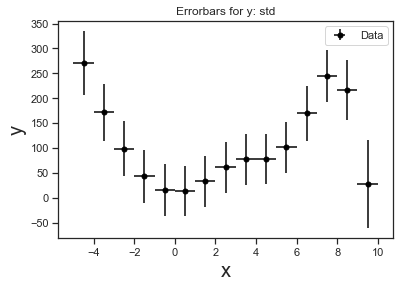

In [26]:
# make a choice:
# yerr: std. error on the mean
# std: width of the distribution in y.
# RMS: RMS of the distribution in y
# depends on what is relevant.
result.plot(
    x='x',
    y='mean',
    xerr='xerr',
    yerr='std',
    linestyle='none',
    capsize=0,
    color='black',
    fmt='o', markersize='5', 
    label="Data"
)
plt.xlabel('x', size = 20)
plt.ylabel('y', size = 20)
plt.legend()
#plt.title('Errorbars for y: error on mean')
plt.title('Errorbars for y: std')
plt.savefig('ProfileFunction_std.png')
plt.show()

<ErrorbarContainer object of 3 artists>

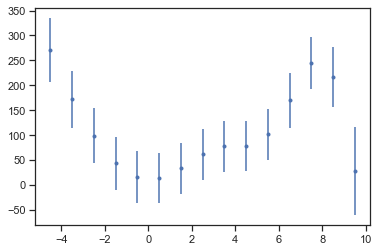

In [27]:
means_result = stats.binned_statistic(x, [y, y**2], bins=n_bins, range=(x_min,x_max), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.')

In [28]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


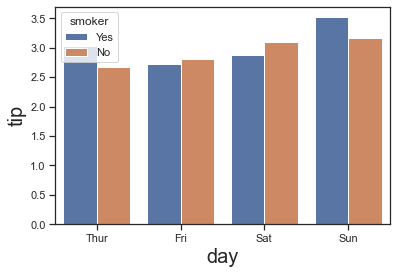

In [29]:
sns.barplot(data=tips,x='day',y='tip', hue="smoker", ci=None)
plt.xlabel('day', size = 20)
plt.ylabel('tip', size = 20)
plt.savefig('Barplot2.png')
plt.show()

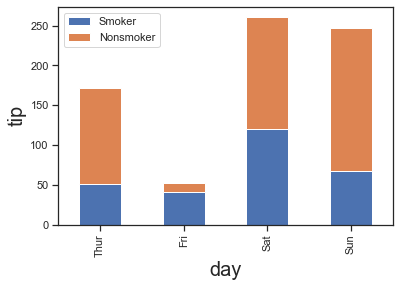

In [30]:
df = tips[['tip','smoker','day']]
df.head()
df1 = df.groupby(['day','smoker']).sum().unstack().fillna(0)
df1.head()
df1.plot(kind='bar',stacked=True)
plt.legend(['Smoker','Nonsmoker'])
plt.xlabel('day', size = 20)
plt.ylabel('tip', size = 20)
plt.savefig('BarplotStacked.png')
plt.show()

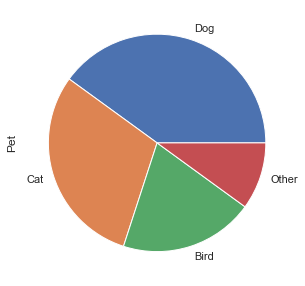

In [31]:
# pie chart
df = pd.DataFrame({'Pet': [40,  30, 20, 10]},
                  index=['Dog', 'Cat', 'Bird', 'Other'])
plot = df.plot.pie(y='Pet', figsize=(5, 5), legend=False)
plt.savefig('PieChart.png')
plt.show()

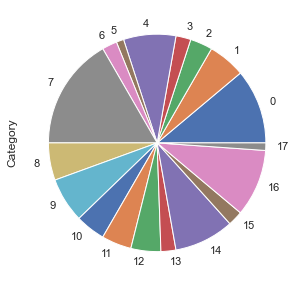

In [32]:
df = pd.DataFrame({'Category': [10,  5, 3,2,7,1,2,15,5, 6,4,4,4,2,8,2,9,1]})
plot = df.plot.pie(y='Category', figsize=(5, 5), legend=False)
plt.savefig('PieChart_many.png')
plt.show()